In [3]:
# pip install transformers tensorflow tf-keras matplotlib pandas seaborn
import pandas as pd
import matplotlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer

2024-04-16 14:13:01.172149: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 14:13:01.176542: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 14:13:01.233489: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 14:13:02.207688: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
classifier = pipeline("text-classification", 
                      model = "j-hartmann/emotion-english-distilroberta-base", # specific model !
                      return_all_scores = True)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


### Predict emotion scores for all lines in the data


In [5]:
data = pd.read_csv("../../../../cds-lang-data/GoT-scripts/Game_of_Thrones_Script.csv")


In [6]:
# append columns for the 7 emotions
data[["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]] = ""

In [7]:
# test on the first 3 rows
data3 = data.head(3)

# loop through all sentences --> predict emotion scores --> append the emotions scores to the specifed, empty columns
for index, row in data3.iterrows():

    # classifier creates lists of dicts with emotion scores for all sentences
    emotion_scores_list = classifier(row["Sentence"]) # returns lists witt dict
    #print(emotion_scores_list)

    # Extract and append the scores to the columns
    for score_dict in emotion_scores_list[0]:
        emotion_label = score_dict['label']
        #print(emotion_label)
        
        emotion_score = score_dict['score']
        #print(emotion_score)
        
        data3.at[index, emotion_label] = emotion_score

print(data3)

  Release Date    Season    Episode     Episode Title          Name  \
0   2011-04-17  Season 1  Episode 1  Winter is Coming  waymar royce   
1   2011-04-17  Season 1  Episode 1  Winter is Coming          will   
2   2011-04-17  Season 1  Episode 1  Winter is Coming  waymar royce   

                                            Sentence     anger   disgust  \
0  What do you expect? They're savages. One lot s...  0.094708  0.840084   
1  I've never seen wildlings do a thing like this...  0.076113    0.6117   
2                             How close did you get?  0.049032  0.018099   

       fear       joy   neutral   sadness  surprise  
0  0.005908  0.001033   0.04299  0.004524  0.010755  
1  0.018282   0.00309  0.128358  0.005489  0.156969  
2  0.029709  0.004799  0.168702  0.015277  0.714381  


### For each season: Plot the distribution of all emotion labels in that season

In [16]:
data3

,Release Date,Season,Episode,Episode Title,Name,Sentence,anger,disgust,fear,joy,neutral,sadness,surprise
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,0.094708,0.840084,0.005908,0.001033,0.04299,0.004524,0.010755
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,0.076113,0.6117,0.018282,0.00309,0.128358,0.005489,0.156969
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,0.049032,0.018099,0.029709,0.004799,0.168702,0.015277,0.714381


/tmp/ipykernel_20599/1477644667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3[emotions] = data3[emotions]
/tmp/ipykernel_20599/1477644667.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[emotion], label = emotion, shade=True)
/tmp/ipykernel_20599/1477644667.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[emotion], label = emotion, shade=True)
/tmp/ipykernel_20599/1477644667.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

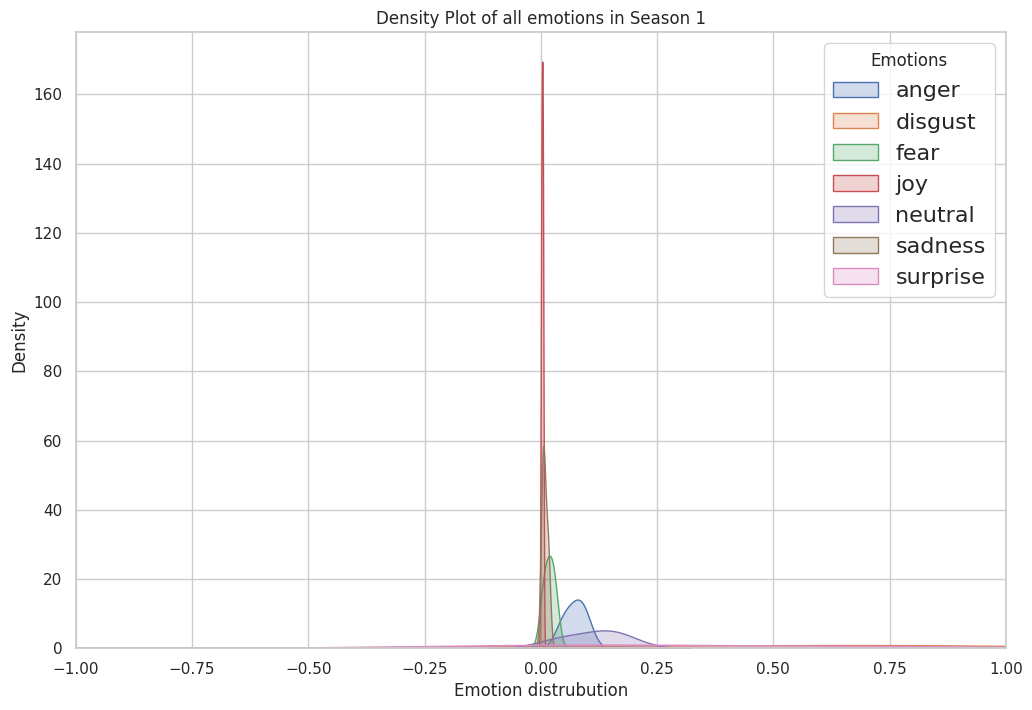

In [10]:
emotions = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
data3[emotions] = data3[emotions]
seasons = sorted(data3['Season'].unique())

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

for emotion in emotions:
        for season in seasons:
            subset = data3[data3['Season'] == season]
            
            # Draw the density plot
            #sns.distplot(subset[emotion], label = {emotion})
            sns.kdeplot(subset[emotion], label = emotion, shade=True)

# Plot formatting
plt.legend(title = 'Emotion', loc = 'upper left')
plt.legend(prop={'size': 16}, title = 'Emotions')
plt.title(f'Density Plot of all emotions in {season}')
plt.xlabel('Emotion distrubution')
plt.ylabel('Density')

plt.xlim(-1, 1)
plt.ylim(0, None)

plt.show()

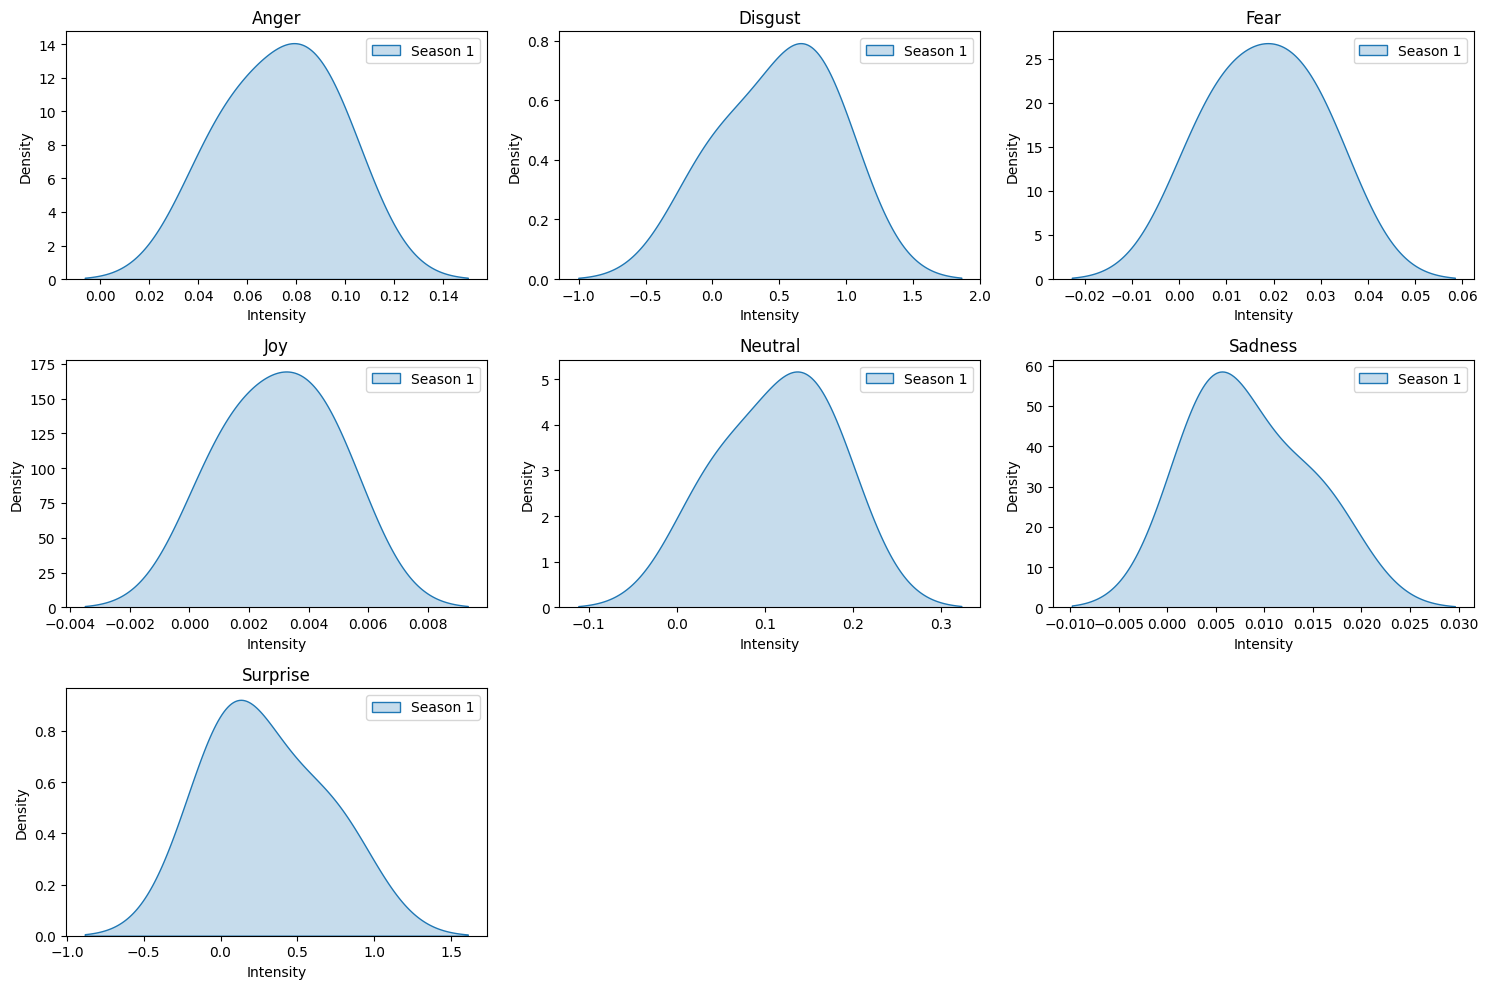

In [8]:
# Distrbution of each emotion pr season
# ... difficult to compare the different emotions

emotions = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
seasons = data3['Season'].unique()

plt.figure(figsize = (15, 10))

for i, emotion in enumerate(emotions, 1):
    plt.subplot(3, 3, i)
    for season in seasons:
        sns.kdeplot(data = data3[data3['Season'] == season], x = emotion, label = season, fill = True)
    plt.title(emotion.capitalize())
    plt.xlabel('Intensity')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()
